# Evolution of Color Terms and The World Color Survey: Final Project

COG 260: Data, Computation, and The Mind (Yang Xu)

Ezra Robens-Paradise and Elif Erzincan

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [1]:
from wcs_helper_functions import *

Import relevant Python libraries.

In [2]:
import numpy as np
from scipy import stats
from random import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
munsellInfo = readChipData('./WCS_data_core/chip.txt')

In [4]:
namingData = readNamingData('./WCS_data_core/term.txt')


In [5]:
fociData = readFociData('./WCS_data_core/foci-exp.txt')


In [56]:
# Helper fucntion for extracting the language and the region
def readlanguageData(namingDataFilePath):
    namingData = {}  # empty dict
    fileHandler = open(namingDataFilePath,'r')

    for line in fileHandler:              			# for each line in the file
        lineElements = line.split()     			# lineElements are denoted by white space
        
    

        languageNumber = int(lineElements[0])    	
        languageName = str(lineElements[1])  		
        country = str(lineElements[2])   

        if not (languageNumber in namingData.keys()):    						# if this language isn't a key in the namingData dict
            namingData[languageNumber] = {}

        namingData[languageNumber][languageName] =  country

    fileHandler.close()				# close file after reading it in, for neatness
    return namingData

languageData = readlanguageData('./WCS_data_core/language.txt')
languageData

{1: {'Abidji': 'Ivory'},
 2: {'Agarabi': 'Papua'},
 3: {'Casiguran': 'Philippines'},
 4: {'Aguacateco': 'Guatemala'},
 5: {'Amarakaeri': 'Peru'},
 6: {'Ampeeli': 'Papua'},
 7: {'Amuzgo': 'Mexico'},
 8: {'Angaatiha': 'Papua'},
 9: {'Apinaye': 'Brazil'},
 10: {'Arabela': 'Peru'},
 11: {'Bahinemo': 'Papua'},
 12: {'Bauzi': 'Indonesia'},
 13: {'Berik': 'Indonesia'},
 14: {'Bete': 'Ivory'},
 15: {'Bhili': 'India'},
 16: {'Buglere': 'Panama'},
 17: {'Cakchiquel': 'Guatemala'},
 18: {'Ucayali_Campa': 'Peru'},
 19: {'Camsa': 'Colombia'},
 20: {'Candoshi': 'Peru'},
 21: {'Cavinea': 'Bolivia'},
 22: {'Cayapa': 'Ecuador'},
 23: {'Chcobo': 'Bolivia'},
 24: {'Chavacano': 'Philippines'},
 25: {'Chayahuita': 'Peru'},
 26: {'Chinanteco': 'Mexico'},
 27: {'Chiquitano': 'Bolivia'},
 28: {'Chumburu': 'Ghana'},
 29: {'Cofan': 'Ecuador'},
 30: {'Colorado': 'Nevada'},
 31: {'Eastern_Cree': 'Canada'},
 32: {'Culina': 'Brazil'},
 33: {'Didinga': 'Sudan'},
 34: {'Djuka': 'Suriname'},
 35: {'Dyimini': 'Ivory'},

# Color Divisions
Red is (1 - 4), 
Red/Yellow ( 5 - 8), 
Yellow ( 9 - 12), 
Green/Yellow ( 13 - 16), 
Green (17 - 20), 
Blue/Green(21 - 24), 
Blue (25 - 28), 
Blue/Purple (29 -32), 
Purple (33 - 36), 
Red/Purple (37 - 40), 

In [7]:
# here we want to look at the foci data and get all the eperimental data for each language that is Blue/Green (colour chip  15 -30)
red_cc = {} 
redyellow_cc = {}
yellow_cc = {}
greenyellow_cc = {}
green_cc = {}
bluegreen_cc = {}
blue_cc = {}
purpleblue_cc = {}
purple_cc = {}
redpurple_cc = {}
white_cc = {}
black_cc = {}

color_chips = [red_cc, redyellow_cc, yellow_cc, greenyellow_cc, green_cc, bluegreen_cc, blue_cc, purpleblue_cc, purple_cc, redpurple_cc, white_cc, black_cc]
color_chip_names = ['red_cc', 'redyellow_cc', 'yellow_cc', 'greenyellow_cc', 'green_cc', 'bluegreen_cc', 'blue_cc', 'purpleblue_cc', 'purple_cc', 'redpurple_cc', 'white_cc', 'black_cc']
for language in fociData:
    red = np.array([])
    redyellow = np.array([])
    yellow = np.array([])
    greenyellow = np.array([])
    green = np.array([])
    bluegreen = np.array([])
    blue = np.array([])
    purpleblue = np.array([])
    purple = np.array([])
    redpurple = np.array([])
    white = np.array([])
    black = np.array([])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour == 0:
                    if fociData[language][speaker][chip][i].split(':')[0] == 'A':
                        white = np.append(white, fociData[language][speaker][chip][i])
                    elif fociData[language][speaker][chip][i].split(':')[0] == 'J':
                        black = np.append(black, fociData[language][speaker][chip][i])
                elif 4 >= colour >= 1 :
                    red = np.append(red, fociData[language][speaker][chip][i])
                    
                elif 8 >= colour >= 5:
                    redyellow = np.append(redyellow, fociData[language][speaker][chip][i])
                elif 12 >= colour >= 9:
                    yellow = np.append(yellow, fociData[language][speaker][chip][i])
                elif 16 >= colour >= 13:
                    greenyellow = np.append(greenyellow, fociData[language][speaker][chip][i])
                elif 20 >= colour >= 17:
                    green = np.append(green, fociData[language][speaker][chip][i])
                elif 24 >= colour >= 21:
                    bluegreen = np.append(bluegreen, fociData[language][speaker][chip][i])
                elif 28 >= colour >= 25:
                    blue = np.append(blue, fociData[language][speaker][chip][i])
                elif 32 >= colour >= 29:
                    purpleblue = np.append(purpleblue, fociData[language][speaker][chip][i])
                elif 36 >= colour >= 33:
                    purple = np.append(purple, fociData[language][speaker][chip][i])
                elif 40 >= colour >= 37:
                    redpurple = np.append(redpurple, fociData[language][speaker][chip][i])
            
    red_cc[language] = len(set(red))
    redyellow_cc[language] = len(set(redyellow))
    yellow_cc[language] = len(set(yellow))
    greenyellow_cc[language] = len(set(greenyellow))
    green_cc[language] = len(set(green))
    bluegreen_cc[language] = len(set(bluegreen))
    blue_cc[language] = len(set(blue))
    purpleblue_cc[language] = len(set(purpleblue))
    purple_cc[language] = len(set(purple))
    redpurple_cc[language] = len(set(redpurple))
    white_cc[language] = len(set(white))
    black_cc[language] = len(set(black))

for i in range(len(color_chips)):
    print(str(color_chip_names[i]) + ': ' + str(color_chips[i]))


red_cc: {1: 24, 2: 19, 3: 15, 4: 24, 5: 9, 6: 22, 7: 19, 8: 13, 9: 17, 10: 29, 11: 15, 12: 17, 13: 13, 14: 9, 15: 19, 16: 14, 17: 32, 18: 29, 19: 16, 20: 13, 21: 7, 22: 16, 23: 5, 24: 18, 25: 6, 26: 19, 27: 18, 28: 15, 29: 11, 30: 8, 31: 6, 32: 32, 33: 5, 34: 19, 35: 11, 36: 8, 37: 9, 38: 22, 39: 19, 40: 10, 41: 16, 42: 16, 43: 27, 44: 10, 45: 12, 46: 16, 47: 6, 48: 11, 49: 18, 50: 10, 51: 32, 52: 24, 53: 17, 54: 13, 55: 16, 56: 10, 57: 27, 58: 15, 59: 16, 60: 12, 61: 7, 62: 13, 63: 30, 64: 26, 65: 14, 66: 31, 67: 22, 68: 16, 69: 13, 70: 11, 71: 9, 72: 25, 73: 9, 74: 8, 75: 14, 76: 19, 77: 18, 78: 4, 79: 10, 80: 12, 81: 7, 82: 7, 83: 32, 84: 16, 85: 12, 86: 4, 87: 14, 88: 21, 89: 18, 90: 17, 91: 8, 92: 19, 93: 15, 94: 9, 95: 19, 96: 9, 97: 19, 98: 27, 99: 8, 100: 6, 101: 12, 102: 20, 103: 20, 104: 7, 105: 6, 106: 20, 107: 16, 108: 8, 109: 21, 110: 12}
redyellow_cc: {1: 16, 2: 19, 3: 7, 4: 29, 5: 5, 6: 17, 7: 18, 8: 3, 9: 6, 10: 28, 11: 7, 12: 10, 13: 7, 14: 3, 15: 10, 16: 5, 17: 31, 18

In [8]:
red_ct = {}
redyellow_ct = {}
yellow_ct = {}
greenyellow_ct = {}
green_ct = {}
bluegreen_ct = {}
blue_ct = {}
purpleblue_ct = {}
purple_ct = {}
redpurple_ct = {}
white_ct = {}
black_ct = {}

color_terms = [red_ct, redyellow_ct, yellow_ct, greenyellow_ct, green_ct, bluegreen_ct, blue_ct, purpleblue_ct, purple_ct, redpurple_ct, white_ct, black_ct]
color_term_names = ['red_ct', 'redyellow_ct', 'yellow_ct', 'greenyellow_ct', 'green_ct', 'bluegreen_ct', 'blue_ct', 'purpleblue_ct', 'purple_ct', 'redpurple_ct', 'white_ct', 'black_ct']



for language in fociData:
    red = np.array([])
    redyellow = np.array([])
    yellow = np.array([])
    greenyellow = np.array([])
    green = np.array([])
    bluegreen = np.array([])
    blue = np.array([])
    purpleblue = np.array([])
    purple = np.array([])
    redpurple = np.array([])
    white = np.array([])
    black = np.array([])
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour == 0:
                    if fociData[language][speaker][chip][i].split(':')[0] == 'A':
                        dictionary = fociData[language][speaker]
                        value = fociData[language][speaker][chip]
                        for  key in dictionary.keys():
                            if value == dictionary[key]:
                                white = np.append(white, key)
                    elif fociData[language][speaker][chip][i].split(':')[0] == 'J':
                        dictionary = fociData[language][speaker]
                        value = fociData[language][speaker][chip]
                        for  key in dictionary.keys():
                            if value == dictionary[key]:
                                black = np.append(black, key)
                elif 4 >= colour >= 1 :
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            red = np.append(red, key)
                elif 8 >= colour >= 5:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            redyellow = np.append(redyellow, key)
                elif 12 >= colour >= 9:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            yellow = np.append(yellow, key)
                elif 16 >= colour >= 13:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            greenyellow = np.append(greenyellow, key)
                elif 20 >= colour >= 17:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            green = np.append(green, key)
                elif 24 >= colour >= 21:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            bluegreen = np.append(bluegreen, key)
                elif 28 >= colour >= 25:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            blue = np.append(blue, key)
                elif 32 >= colour >= 29:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            purpleblue = np.append(purpleblue, key)
                elif 36 >= colour >= 33:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            purple = np.append(purple, key)
                elif 40 >= colour >= 37:
                    dictionary = fociData[language][speaker]
                    value = fociData[language][speaker][chip]
                    for  key in dictionary.keys():
                        if value == dictionary[key]:
                            redpurple = np.append(redpurple, key)
                
    
    red_ct[language] = len(set(red))
    redyellow_ct[language] = len(set(redyellow))
    yellow_ct[language] = len(set(yellow))
    greenyellow_ct[language] = len(set(greenyellow))
    green_ct[language] = len(set(green))
    bluegreen_ct[language] = len(set(bluegreen))
    blue_ct[language] = len(set(blue))
    purpleblue_ct[language] = len(set(purpleblue))
    purple_ct[language] = len(set(purple))
    redpurple_ct[language] = len(set(redpurple))
    white_ct[language] = len(set(white))
    black_ct[language] = len(set(black))

for i in range(len(color_terms)):
    print(str(color_term_names[i]) + ': ' + str(color_terms[i]))




red_ct: {1: 4, 2: 8, 3: 4, 4: 4, 5: 2, 6: 12, 7: 8, 8: 3, 9: 2, 10: 9, 11: 2, 12: 2, 13: 3, 14: 2, 15: 6, 16: 2, 17: 9, 18: 9, 19: 8, 20: 3, 21: 1, 22: 5, 23: 1, 24: 5, 25: 2, 26: 5, 27: 16, 28: 3, 29: 3, 30: 1, 31: 1, 32: 10, 33: 2, 34: 9, 35: 3, 36: 1, 37: 4, 38: 7, 39: 4, 40: 2, 41: 5, 42: 13, 43: 6, 44: 4, 45: 1, 46: 4, 47: 3, 48: 5, 49: 5, 50: 1, 51: 11, 52: 8, 53: 2, 54: 4, 55: 5, 56: 4, 57: 8, 58: 5, 59: 8, 60: 2, 61: 2, 62: 4, 63: 14, 64: 15, 65: 6, 66: 5, 67: 15, 68: 5, 69: 3, 70: 2, 71: 2, 72: 6, 73: 5, 74: 1, 75: 4, 76: 12, 77: 2, 78: 2, 79: 2, 80: 3, 81: 2, 82: 3, 83: 4, 84: 8, 85: 4, 86: 2, 87: 2, 88: 7, 89: 6, 90: 4, 91: 5, 92: 5, 93: 6, 94: 2, 95: 5, 96: 2, 97: 10, 98: 7, 99: 1, 100: 1, 101: 4, 102: 9, 103: 11, 104: 1, 105: 1, 106: 5, 107: 3, 108: 1, 109: 5, 110: 2}
redyellow_ct: {1: 3, 2: 7, 3: 2, 4: 8, 5: 2, 6: 7, 7: 6, 8: 2, 9: 3, 10: 8, 11: 4, 12: 1, 13: 7, 14: 3, 15: 4, 16: 2, 17: 10, 18: 8, 19: 5, 20: 2, 21: 4, 22: 4, 23: 1, 24: 5, 25: 2, 26: 4, 27: 13, 28: 8, 29: 

In [9]:
# gets the total number of of unique terms for each language

total_terms = {}
for colour in color_terms:
    for language in colour:
        if language in total_terms:
            total_terms[language] += colour[language]
        else:
            total_terms[language] = colour[language]

In [10]:
# sorts the languages by the total number of terms
sorted_total_terms = sorted(total_terms.items(), key=lambda kv: kv[1])



In [11]:
# a function that checks if a language has a term for a colour and returns 1 if it does and 0 if it doesn't
def check_term(language, colour):
    value = 0
    if colour == 'red':
        if red_ct[language] > 0:
            value = 1
        if redyellow_ct[language] > 0:
            value = 1
        if redpurple_ct[language] > 0:
            value = 1
    elif colour == 'yellow':
        if yellow_ct[language] > 0:
            value = 1
        if redyellow_ct[language] > 0:
            value = 1
        if greenyellow_ct[language] > 0:
            value = 1
    elif colour == 'green':
        if green_ct[language] > 0:
            value = 1
        if greenyellow_ct[language] > 0:
            value = 1
        if bluegreen_ct[language] > 0:
            value = 1
    elif colour == 'blue':
        if blue_ct[language] > 0:
            value = 1
        if bluegreen_ct[language] > 0:
            value = 1
        if purpleblue_ct[language] > 0:
            value = 1
    elif colour == 'purple':
        if purple_ct[language] > 0:
            value = 1
        if purpleblue_ct[language] > 0:
            value = 1
        if redpurple_ct[language] > 0:
            value = 1
    elif colour == 'white':
        if white_ct[language] > 0:
            value = 1
    elif colour == 'black':
        if black_ct[language] > 0:
            value = 1
    return value


In [12]:
# creates a dictionary of the sorted languages and if they have a term for a colour
binary_table = {}
for language in sorted_total_terms:
    binary_table[language[0]] = {}
    binary_table[language[0]]['Total Terms'] = language[1]
    binary_table[language[0]]['white'] = check_term(language[0], 'white')
    binary_table[language[0]]['black'] = check_term(language[0], 'black')
    binary_table[language[0]]['red'] = check_term(language[0], 'red')
    binary_table[language[0]]['yellow'] = check_term(language[0], 'yellow')
    binary_table[language[0]]['green'] = check_term(language[0], 'green')
    binary_table[language[0]]['blue'] = check_term(language[0], 'blue')
    binary_table[language[0]]['purple'] = check_term(language[0], 'purple')


# creates a dataframe from the binary table
binary_table_df = pd.DataFrame(binary_table)
binary_table_df = binary_table_df.T

binary_table_df.to_csv('sorted_binary_table.csv', index=False)
binary_table_df.head(15)

,Total Terms,white,black,red,yellow,green,blue,purple
105,4,1,1,1,1,0,0,0
104,6,1,1,1,0,0,1,1
36,7,1,1,1,1,0,0,1
74,8,1,1,1,1,1,1,1
53,10,0,0,1,1,1,1,1
77,10,1,1,1,1,0,1,1
31,11,1,1,1,1,1,1,1
33,11,1,1,1,1,1,0,1
25,14,1,1,1,1,1,1,1
100,14,1,1,1,1,1,1,1


In [13]:
# create a list of all the languages that were shown at least one colour chip from each colour category

colors_seen = {}
for language in fociData:
    colors_seen[language] = {}
    colors_seen[language]['red'] = 0
    colors_seen[language]['yellow'] = 0
    colors_seen[language]['green'] = 0
    colors_seen[language]['blue'] = 0
    colors_seen[language]['purple'] = 0
    colors_seen[language]['white'] = 0
    colors_seen[language]['black'] = 0
    for speaker in fociData[language]:
        for chip in fociData[language][speaker]:
            for i in range(len(fociData[language][speaker][chip])):
                colour = int(fociData[language][speaker][chip][i].split(':')[1])
                if colour == 0:
                    if fociData[language][speaker][chip][i].split(':')[0] == 'A':
                        colors_seen[language]['white'] = 1
                    elif fociData[language][speaker][chip][i].split(':')[0] == 'B':
                        colors_seen[language]['black'] = 1
                elif 4 >= colour >= 1 :
                    colors_seen[language]['red'] = 1
                elif 8 >= colour >= 5:
                    colors_seen[language]['yellow'] = 1
                elif 12 >= colour >= 9:
                    colors_seen[language]['green'] = 1
                elif 16 >= colour >= 13:
                    colors_seen[language]['blue'] = 1
                elif 20 >= colour >= 17:
                    colors_seen[language]['purple'] = 1
                elif 24 >= colour >= 21:
                    colors_seen[language]['blue'] = 1
                elif 28 >= colour >= 25:
                    colors_seen[language]['purple'] = 1
                elif 32 >= colour >= 29:
                    colors_seen[language]['red'] = 1
                elif 36 >= colour >= 33:
                    colors_seen[language]['yellow'] = 1
                elif 40 >= colour >= 37:
                    colors_seen[language]['green'] = 1

seen_all_colors = []
for language in colors_seen:
    if colors_seen[language]['red'] == 1 and colors_seen[language]['yellow'] == 1 and colors_seen[language]['green'] == 1 and colors_seen[language]['blue'] == 1 and colors_seen[language]['purple'] == 1 and colors_seen[language]['white'] == 1 and colors_seen[language]['black'] == 1:
        seen_all_colors.append(language)
seen_black_white = []
for language in colors_seen:
    if colors_seen[language]['white'] == 1 and colors_seen[language]['black'] == 1:
        seen_black_white.append(language)
seen_red_black_white = []
for language in colors_seen:
    if colors_seen[language]['white'] == 1 and colors_seen[language]['black'] == 1 and colors_seen[language]['red'] == 1:
        seen_red_black_white.append(language)


seen_all_colors = sorted(seen_all_colors, key=lambda x: total_terms[x])
seen_black_white = sorted(seen_black_white, key=lambda x: total_terms[x])
seen_red_black_white = sorted(seen_red_black_white, key=lambda x: total_terms[x])



In [14]:
black_white_table = {}
for language in sorted_total_terms:
    black_white_table[language[0]] = {}
    black_white_table[language[0]]['Total Terms'] = language[1]
    black_white_table[language[0]]['white'] = check_term(language[0], 'white')
    black_white_table[language[0]]['black'] = check_term(language[0], 'black')
    black_white_table[language[0]]['red'] = check_term(language[0], 'red')
    black_white_table[language[0]]['yellow'] = check_term(language[0], 'yellow')
    black_white_table[language[0]]['green'] = check_term(language[0], 'green')
    black_white_table[language[0]]['blue'] = check_term(language[0], 'blue')
    black_white_table[language[0]]['purple'] = check_term(language[0], 'purple')

black_white_table_df = pd.DataFrame(black_white_table)
black_white_table_df = black_white_table_df.T

black_white_table_df.to_csv('black_white_table.csv', index=False)
black_white_table_df

,Total Terms,white,black,red,yellow,green,blue,purple
105,4,1,1,1,1,0,0,0
104,6,1,1,1,0,0,1,1
36,7,1,1,1,1,0,0,1
74,8,1,1,1,1,1,1,1
53,10,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...
51,89,1,1,1,1,1,1,1
67,91,1,1,1,1,1,1,1
103,94,1,1,1,1,1,1,1
32,101,1,1,1,1,1,1,1


In [15]:
red_black_white_table = {}
for language in sorted_total_terms:
    red_black_white_table[language[0]] = {}
    red_black_white_table[language[0]]['Total Terms'] = language[1]
    red_black_white_table[language[0]]['white'] = check_term(language[0], 'white')
    red_black_white_table[language[0]]['black'] = check_term(language[0], 'black')
    red_black_white_table[language[0]]['red'] = check_term(language[0], 'red')
    red_black_white_table[language[0]]['yellow'] = check_term(language[0], 'yellow')
    red_black_white_table[language[0]]['green'] = check_term(language[0], 'green')
    red_black_white_table[language[0]]['blue'] = check_term(language[0], 'blue')
    red_black_white_table[language[0]]['purple'] = check_term(language[0], 'purple')

red_black_white_table_df = pd.DataFrame(red_black_white_table)
red_black_white_table_df = red_black_white_table_df.T

red_black_white_table_df.to_csv('red_black_white_table.csv', index=False)
red_black_white_table_df


,Total Terms,white,black,red,yellow,green,blue,purple
105,4,1,1,1,1,0,0,0
104,6,1,1,1,0,0,1,1
36,7,1,1,1,1,0,0,1
74,8,1,1,1,1,1,1,1
53,10,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...
51,89,1,1,1,1,1,1,1
67,91,1,1,1,1,1,1,1
103,94,1,1,1,1,1,1,1
32,101,1,1,1,1,1,1,1


In [16]:
all_colors_table = {}
for language in sorted_total_terms:
    all_colors_table[language[0]] = {}
    all_colors_table[language[0]]['Total Terms'] = language[1]
    all_colors_table[language[0]]['white'] = check_term(language[0], 'white')
    all_colors_table[language[0]]['black'] = check_term(language[0], 'black')
    all_colors_table[language[0]]['red'] = check_term(language[0], 'red')
    all_colors_table[language[0]]['yellow'] = check_term(language[0], 'yellow')
    all_colors_table[language[0]]['green'] = check_term(language[0], 'green')
    all_colors_table[language[0]]['blue'] = check_term(language[0], 'blue')
    all_colors_table[language[0]]['purple'] = check_term(language[0], 'purple')

all_colors_table_df = pd.DataFrame(all_colors_table)
all_colors_table_df = all_colors_table_df.T

all_colors_table_df.to_csv('all_colors_table.csv', index=False)
all_colors_table_df


,Total Terms,white,black,red,yellow,green,blue,purple
105,4,1,1,1,1,0,0,0
104,6,1,1,1,0,0,1,1
36,7,1,1,1,1,0,0,1
74,8,1,1,1,1,1,1,1
53,10,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...
51,89,1,1,1,1,1,1,1
67,91,1,1,1,1,1,1,1
103,94,1,1,1,1,1,1,1
32,101,1,1,1,1,1,1,1


# Data Summary

In [17]:
# Make a dataframe with each language and the number of each colour group of terms they have

df = pd.DataFrame({'language': list(red_ct.keys()), 'red_ct': list(red_ct.values()), 'redyellow_ct': list(redyellow_ct.values()), 'yellow_ct': list(yellow_ct.values()), 'greenyellow_ct': list(greenyellow_ct.values()), 'green_ct': list(green_ct.values()), 'bluegreen_ct': list(bluegreen_ct.values()), 'blue_ct': list(blue_ct.values()), 'purpleblue_ct': list(purpleblue_ct.values()), 'purple_ct': list(purple_ct.values()), 'redpurple_ct': list(redpurple_ct.values()), 'white_ct': list(white_ct.values()), 'black_ct': list(black_ct.values()), 'total_terms': list(total_terms.values())})
df[df['language'] == 74]


,language,red_ct,redyellow_ct,yellow_ct,greenyellow_ct,green_ct,bluegreen_ct,blue_ct,purpleblue_ct,purple_ct,redpurple_ct,white_ct,black_ct,total_terms
73,74,1,0,0,1,1,1,1,0,0,1,1,1,8


# Hypothesis Test for White and Black

Null Hypothesis (H0): The proportion of languages that have terms for both white and black is equal to 1 (100%). 

Alternative Hypothesis (H1): The proportion of languages that have terms for both white and black is less than 1. 

In [18]:
from scipy.stats import norm

pass_fail = {}
proportion = {}
sample_sizes = {}

# obtain the proportion of languages in the dataset that contain color terms for white and black
count = 0
sample_size = 0
for language in fociData:
    sample_size += 1
    check_black = check_term(language, "black")
    check_white = check_term(language, "white")
    if check_black and check_white:
        count +=1
sample_proportion = count / sample_size
print (sample_size)
print(sample_proportion)

null_hypothesis_proportion = 1 #to resolve ZeroDivisionError  

# Calculating the standard error
var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
p_value = norm.cdf(z_score)

proportion['black_white'] = sample_proportion
sample_sizes['black_white'] = sample_size
z_score, p_value
pass_fail['black_white'] = p_value

110
0.9818181818181818


# Hypothesis Test for Red

Null Hypothesis (H0): The proportion of languages with at least 3 terms that have a color term for red is 1 (100%). 

Alternative Hypothesis (H1): The proportion of languages with at least 3 terms that have a color term for red is less than 1. 

In [19]:
sample_size = 0
count = 0
for language in fociData:
    #check if there are at least 3 color terms
    if binary_table[language]['Total Terms'] >= 3:
        sample_size += 1
        check_red = check_term(language, "red")
        check_black = check_term(language, "black")
        check_white = check_term(language, "white")
        if check_black and check_white and check_red:
            count +=1
sample_proportion = count / sample_size
print(sample_proportion)

 #TODO - check if this is the correct null hypothesis
null_hypothesis_proportion = 0.99 #to resolve ZeroDivisionError  

var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
p_value = norm.cdf(z_score)

proportion['red_black_white'] = sample_proportion
sample_sizes['red_black_white'] = sample_size
print(z_score, p_value)
pass_fail['red'] = p_value


0.9818181818181818
-0.6422616289332561 0.26035166189905024


# Hypothesis Test for Green or Yellow

Null Hypothesis (H0): The proportion of languages with at least 4 terms that have a color term for green OR yellow, but not both, is 1 (100%). 

Alternative Hypothesis (H1): The proportion of languages with at least 4 terms that have a color term for green OR yellow, but not both, is less than 1. 

In [20]:
sample_size = 0
count = 0
for language in fociData:
    #check if there are at least 4 color terms
    if binary_table[language]['Total Terms'] >= 4:
        sample_size += 1
        check_yellow = check_term(language, "yellow")
        check_green = check_term(language, "green")
        check_red = check_term(language, "red")
        check_black = check_term(language, "black")
        check_white = check_term(language, "white")
        if check_black and check_white and check_red and ((check_yellow == 1 and check_green == 0) or (check_yellow == 0 and check_green == 1)):
            count +=1
sample_proportion = count / sample_size
print (sample_size)

null_hypothesis_proportion = 1 #to resolve ZeroDivisionError  

# Calculating the standard error
var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
p_value = norm.cdf(z_score)

proportion['green_or_yellow'] = sample_proportion
sample_sizes['green_or_yellow'] = sample_size
print(z_score, p_value)

pass_fail['yellow_or_green'] = p_value

110
-62.636517570290685 0.0


# Hypothesis Test for Green and Yellow (Continued)

Null Hypothesis (H0): The proportion of languages with at least 5 terms that have a color term for both green and yellow is 1 (100%). 

Alternative Hypothesis (H1): The proportion of languages with at least 5 terms that have a color term for both green and yellow is less than 1. 

In [21]:
sample_size = 0
count = 0
for language in fociData:
    #check if there are at least 5 color terms
    if binary_table[language]['Total Terms'] >= 5:
        sample_size += 1
        check_yellow = check_term(language, "yellow")
        check_green = check_term(language, "green")
        check_red = check_term(language, "red")
        check_black = check_term(language, "black")
        check_white = check_term(language, "white")
        if check_black and check_white and check_red and check_yellow and check_green:
            count +=1
sample_proportion = count / sample_size

null_hypothesis_proportion = 1 #to resolve ZeroDivisionError  

# Calculating the standard error
var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
p_value = norm.cdf(z_score)

proportion['yellow_and_green'] = sample_proportion
sample_sizes['yellow_and_green'] = sample_size
print(z_score, p_value)

pass_fail['yellow_and_green'] = p_value


-2.289188636915842 0.011034197266618837


# Hypothesis Test for Blue

Null Hypothesis (H0): The proportion of languages with at least 6 terms that have a color term for blue is 1 (100%). 

Alternative Hypothesis (H1): The proportion of languages with at least 6 terms that have a color term for blue is less than 1. 

In [22]:
sample_size = 0
count = 0
for language in fociData:
    #check if there are at least 6 color terms
    if binary_table[language]['Total Terms'] >= 6:
        sample_size += 1
        check_blue = check_term(language, "blue")
        check_yellow = check_term(language, "yellow")
        check_green = check_term(language, "green")
        check_red = check_term(language, "red")
        check_black = check_term(language, "black")
        check_white = check_term(language, "white")
        if check_black and check_white and check_red and check_yellow and check_green and check_blue:
            count +=1
sample_proportion = count / sample_size
print(sample_proportion)


null_hypothesis_proportion = 1  #to resolve ZeroDivisionError  

# Calculating the standard error
var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
p_value = norm.cdf(z_score)

proportion['blue'] = sample_proportion
sample_sizes['blue'] = sample_size
print(z_score, p_value)

pass_fail['blue'] = p_value

0.944954128440367
-2.5198243119524815 0.0058706711012068875


# Hypothesis Test for Purple

Null Hypothesis (H0): The proportion of languages with at least 8 terms that have a color term for purple is 1 (100%). 

Alternative Hypothesis (H1): The proportion of languages with at least 8 terms that have a color term for purple is less than 1. 

In [23]:
sample_size = 0
count = 0
for language in fociData:
    #check if there are at least 6 color terms
    if binary_table[language]['Total Terms'] >= 8:
        sample_size += 1
        check_purple = check_term(language, "purple")
        check_blue = check_term(language, "blue")
        check_yellow = check_term(language, "yellow")
        check_green = check_term(language, "green")
        check_red = check_term(language, "red")
        check_black = check_term(language, "black")
        check_white = check_term(language, "white")
        if check_black and check_white and check_red and check_yellow and check_green and check_blue and check_purple:
            count +=1
sample_proportion = count / sample_size
print(sample_proportion)


null_hypothesis_proportion = 1  #to resolve ZeroDivisionError  

#Calculating the standard error
var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
p_value = norm.cdf(z_score)

proportion['purple'] = sample_proportion
sample_sizes['purple'] = sample_size
print(z_score, p_value)

pass_fail['purple'] = p_value

0.9626168224299065
-2.0384650612225963 0.02075172272424725


In [24]:
for p in pass_fail:
    if pass_fail[p] > 0.05:
        print(p + ' passed')
    else:
        print(p + ' reject the hypothesis')

black_white passed
red passed
yellow_or_green reject the hypothesis
yellow_and_green reject the hypothesis
blue reject the hypothesis
purple reject the hypothesis


In [25]:
print(pass_fail)
print(proportion)

{'black_white': 0.0767542024021843, 'red': 0.26035166189905024, 'yellow_or_green': 0.0, 'yellow_and_green': 0.011034197266618837, 'blue': 0.0058706711012068875, 'purple': 0.02075172272424725}
{'black_white': 0.9818181818181818, 'red_black_white': 0.9818181818181818, 'green_or_yellow': 0.02727272727272727, 'yellow_and_green': 0.9541284403669725, 'blue': 0.944954128440367, 'purple': 0.9626168224299065}


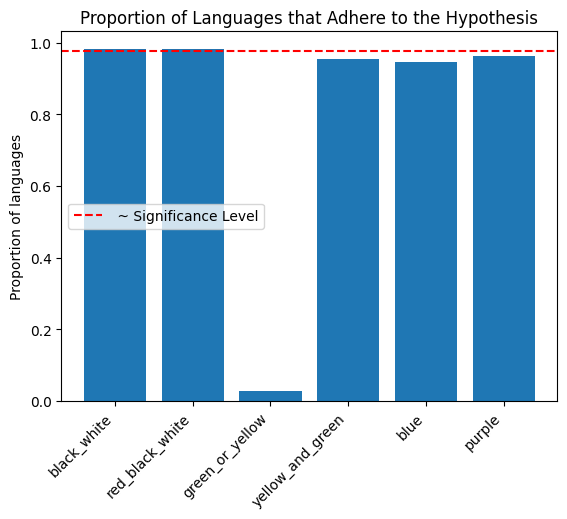

In [26]:
significanct = 0.976

plt.bar(range(len(proportion)), list(proportion.values()), align='center')
plt.axhline(y= significanct, color='red', linestyle='--', label=' ~ Significance Level')
plt.xticks(range(len(proportion)), list(proportion.keys()))
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of languages')
plt.title('Proportion of Languages that Adhere to the Hypothesis')
plt.legend()
plt.show()

# k-means Clustering

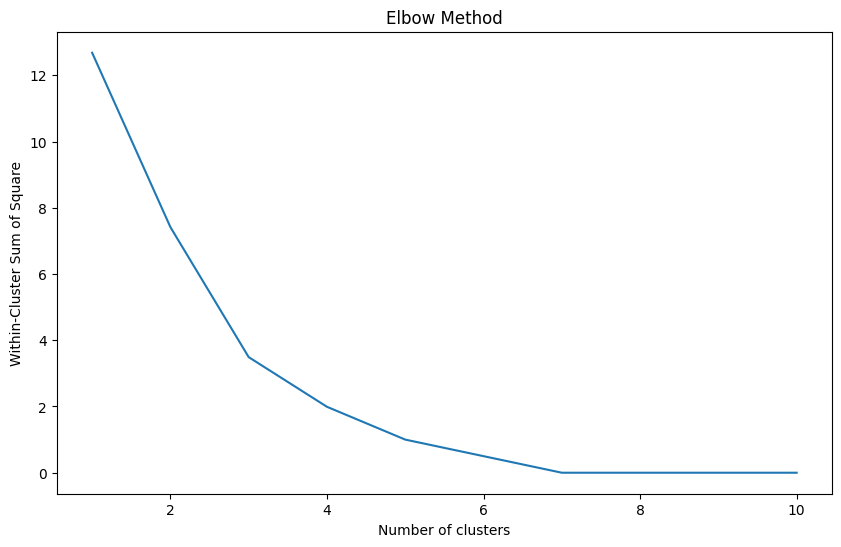

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_for_clustering = binary_table_df.drop('Total Terms', axis=1)

#Elbow Method to find the optimal number of clusters
wcss = [] 
for i in range(1, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()


For k-means clustering, the point where the curve starts to bend is called the elbow point and is generally considered a good choice for k. For the above plot, the elbow point is at 2, which will be our choice of k.

In [28]:
chosen_k = 3

kmeans = KMeans(n_clusters=chosen_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_for_clustering)

# Adding cluster labels to your original dataframe
binary_table_df['Cluster'] = cluster_labels

# Now you can analyze the clusters
print(binary_table_df.head())


     Total Terms  white  black  red  yellow  green  blue  purple  Cluster
105            4      1      1    1       1      0     0       0        1
104            6      1      1    1       0      0     1       1        1
36             7      1      1    1       1      0     0       1        1
74             8      1      1    1       1      1     1       1        0
53            10      0      0    1       1      1     1       1        2


         Total Terms  white  black  red  yellow  green      blue  purple
Cluster                                                                 
0          40.057692    1.0    1.0  1.0    1.00    1.0  0.990385    1.00
1           6.750000    1.0    1.0  1.0    0.75    0.0  0.500000    0.75
2          12.500000    0.0    0.0  1.0    1.00    1.0  1.000000    1.00


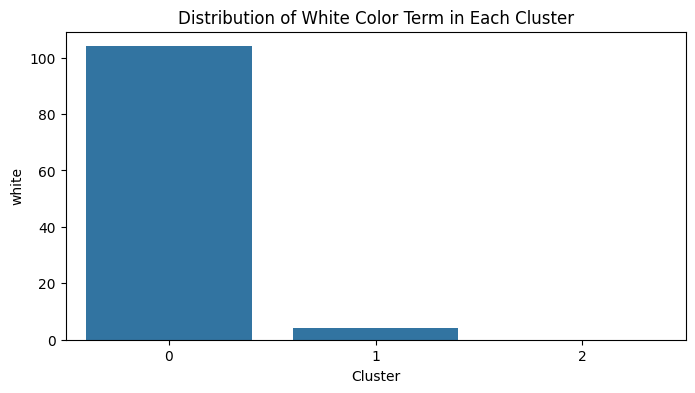

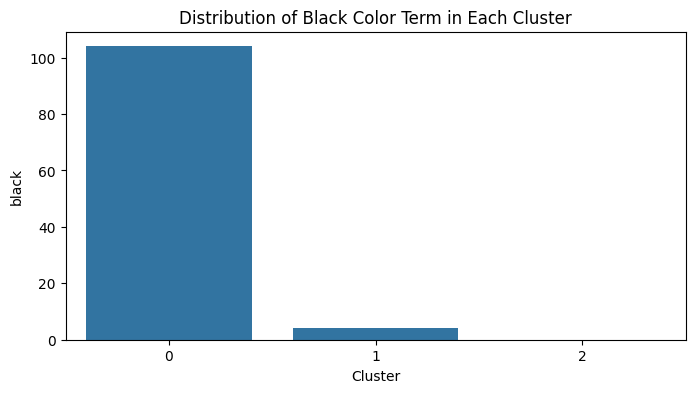

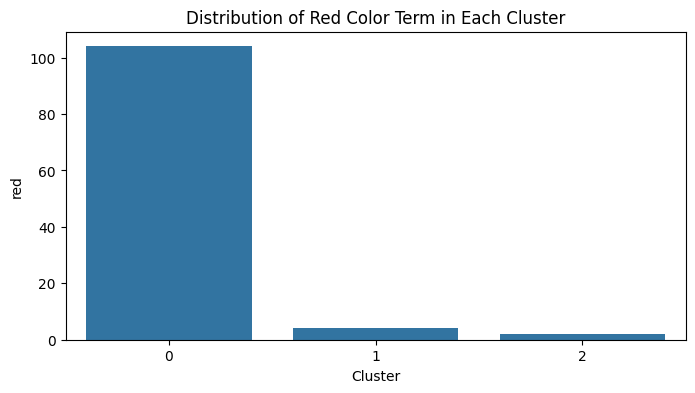

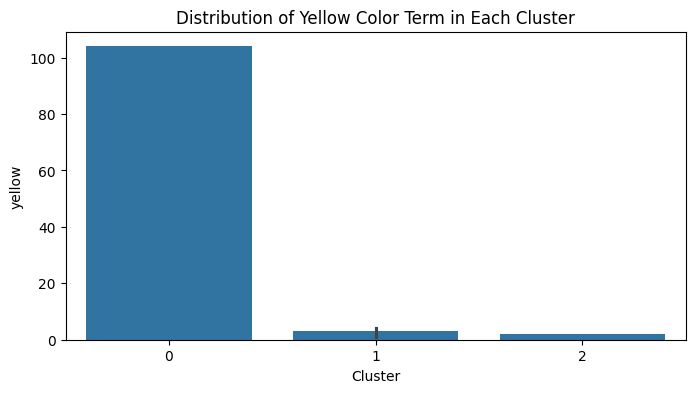

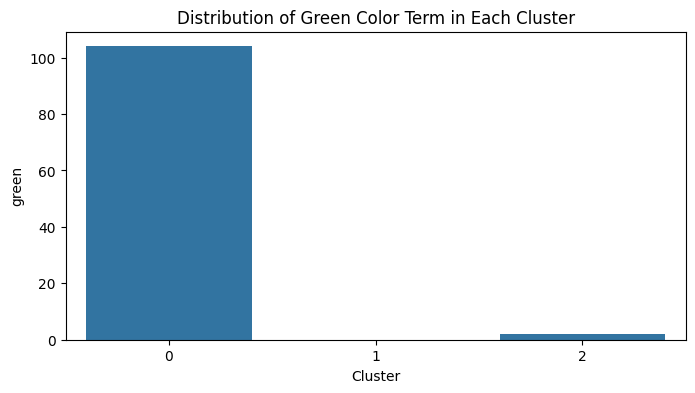

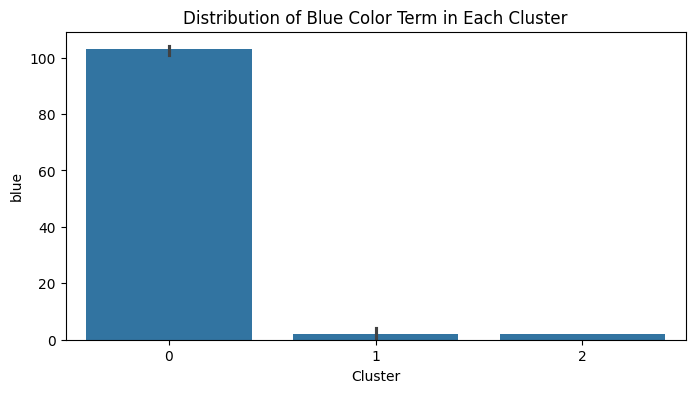

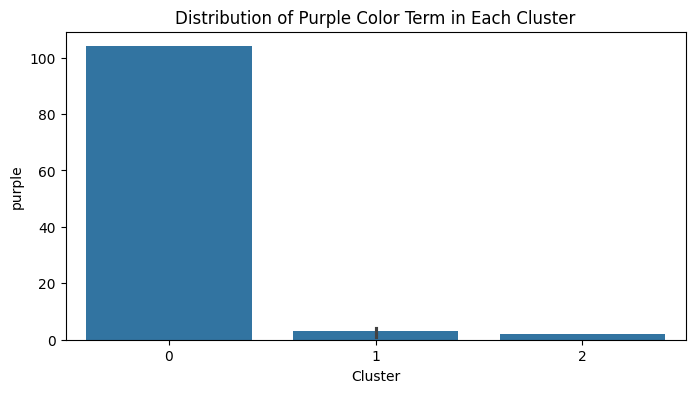

In [29]:
import seaborn as sns

# Cluster Profiling: Mean values for each cluster
cluster_means = binary_table_df.groupby('Cluster').mean()
print(cluster_means)

for color in ['white', 'black', 'red', 'yellow', 'green', 'blue', 'purple']:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Cluster', y=color, data=binary_table_df, estimator=sum)
    plt.title(f'Distribution of {color.capitalize()} Color Term in Each Cluster')
    plt.show()


In [30]:
from scipy.stats import chi2_contingency

#contingency table for each color term
for color in ['white', 'black', 'red', 'yellow', 'green', 'blue', 'purple']:
    contingency_table = pd.crosstab(binary_table_df['Cluster'], binary_table_df[color])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {color} color term: p-value = {p}")


Chi-square test for white color term: p-value = 1.2995814250074903e-24
Chi-square test for black color term: p-value = 1.2995814250074903e-24
Chi-square test for red color term: p-value = 1.0
Chi-square test for yellow color term: p-value = 1.5588539828869326e-06
Chi-square test for green color term: p-value = 1.2995814250074813e-24
Chi-square test for blue color term: p-value = 2.5450753460768518e-08
Chi-square test for purple color term: p-value = 1.5588539828869326e-06


In [31]:
stage_colors = {
    'Stage I': ['black', 'white'],
    'Stage II': ['black', 'white', 'red'],
    'Stage III': [],
    'Stage IV': ['black', 'white', 'red', 'yellow', 'green'],
    'Stage V': ['black', 'white', 'red', 'yellow', 'green', 'blue'],
    'Stage VI': ['black', 'white', 'red', 'yellow', 'green', 'blue', 'purple']}

min_terms_per_stage = {
    'Stage I': 2,   #At least 2 color terms (black and white)
    'Stage II': 3,  #At least 3 color terms (black, white, red)
    'Stage III': 4, #At least 4 color terms (black, white, red, and yellow or green)
    'Stage IV': 5,  #At least 5 color terms (black, white, red, yellow, green)
    'Stage V': 6,   #At least 6 color terms (black, white, red, yellow, green, blue),
    'Stage VI': 8,   #At least 6 color terms (black, white, red, yellow, green, blue)
}

cluster_sample_size = {}
def assess_cluster_alignment(cluster_df, stage_colors, min_terms_per_stage):
    cluster_alignment = {}
    for stage, colors in stage_colors.items():
        min_terms = min_terms_per_stage[stage]
        filtered_df = cluster_df[cluster_df['Total Terms'] >= min_terms]
        cluster_sample_size[stage] = len(filtered_df)
        if stage != 'Stage III':
            conformity = filtered_df.apply(lambda row: all(row.get(color, 0) == 1 for color in colors), axis=1).mean()
        else:
            #Special handling for Stage III
            conformity = filtered_df.apply(lambda row: (row['yellow'] == 1) ^ (row['green'] == 1), axis=1).mean()
        
        cluster_alignment[stage] = conformity
    return cluster_alignment, cluster_sample_size
 

In [32]:
cluster_results = {}
for cluster in binary_table_df['Cluster'].unique():
    cluster_df = binary_table_df[binary_table_df['Cluster'] == cluster]
    cluster_results[cluster] = assess_cluster_alignment(cluster_df, stage_colors, min_terms_per_stage)[0]
    cluster_sample_size[cluster] = assess_cluster_alignment(cluster_df, stage_colors, min_terms_per_stage)[1]
    print(cluster_sample_size)

#


print(cluster_results)
cluster_sample_size

{'Stage I': 4, 'Stage II': 4, 'Stage III': 4, 'Stage IV': 3, 'Stage V': 3, 'Stage VI': 1, 1: {...}}
{'Stage I': 104, 'Stage II': 104, 'Stage III': 104, 'Stage IV': 104, 'Stage V': 104, 'Stage VI': 104, 1: {...}, 0: {...}}
{'Stage I': 2, 'Stage II': 2, 'Stage III': 2, 'Stage IV': 2, 'Stage V': 2, 'Stage VI': 2, 1: {...}, 0: {...}, 2: {...}}
{1: {'Stage I': 1.0, 'Stage II': 1.0, 'Stage III': 0.75, 'Stage IV': 0.0, 'Stage V': 0.0, 'Stage VI': 0.0}, 0: {'Stage I': 1.0, 'Stage II': 1.0, 'Stage III': 0.0, 'Stage IV': 1.0, 'Stage V': 0.9903846153846154, 'Stage VI': 0.9903846153846154}, 2: {'Stage I': 0.0, 'Stage II': 0.0, 'Stage III': 0.0, 'Stage IV': 0.0, 'Stage V': 0.0, 'Stage VI': 0.0}}


{'Stage I': 2,
 'Stage II': 2,
 'Stage III': 2,
 'Stage IV': 2,
 'Stage V': 2,
 'Stage VI': 2,
 1: {...},
 0: {...},
 2: {...}}

In [33]:

l = [ 0.69, 0.963,0.964,0.97, 0.976, 0.98, 0.99, 0.999]
sample_size = 6
ps = {}
for n in l:
    var = n * (1 - n)
    standard_error =  ( var / sample_size) ** 0.5
    z_score = (n - 1) / standard_error
    p_value = norm.cdf(z_score)
    if p_value > 0.05:
        ps[n] = p_value

ps
    

{0.69: 0.05031115458610947,
 0.963: 0.31556570977263837,
 0.964: 0.3179794242402167,
 0.97: 0.33331602766123797,
 0.976: 0.3504482229282325,
 0.98: 0.36319670190114806,
 0.99: 0.4027702943337469,
 0.999: 0.46911352175777726}

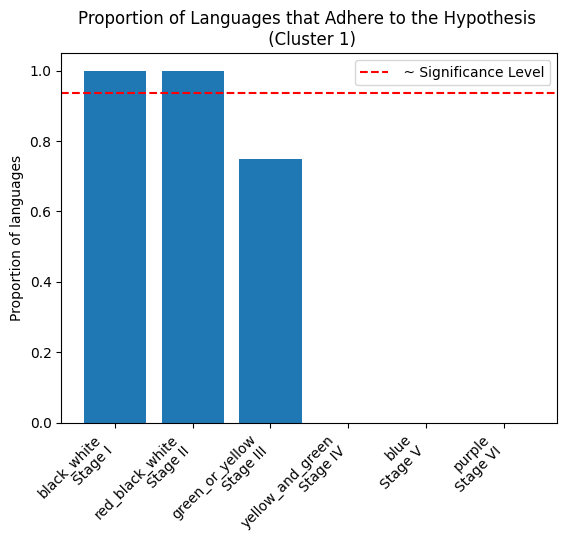

In [34]:
# plot the results of the clustering for cluster 1 
names = ['black_white', 'red_black_white', 'green_or_yellow', 'yellow_and_green', 'blue', 'purple']
labels = []
count = 0 
for s in list(cluster_results[1].keys()):
    labels.append(names[count] + '\n'+  s)
    count += 1


plt.bar(range(len(cluster_results[1])), list(cluster_results[1].values()), align='center')
plt.axhline(y= 0.9355, color='red', linestyle='--', label=' ~ Significance Level')
plt.xticks(range(len(cluster_results[1])), labels)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of languages')
plt.title('Proportion of Languages that Adhere to the Hypothesis \n (Cluster 1)')
plt.legend()
plt.show()



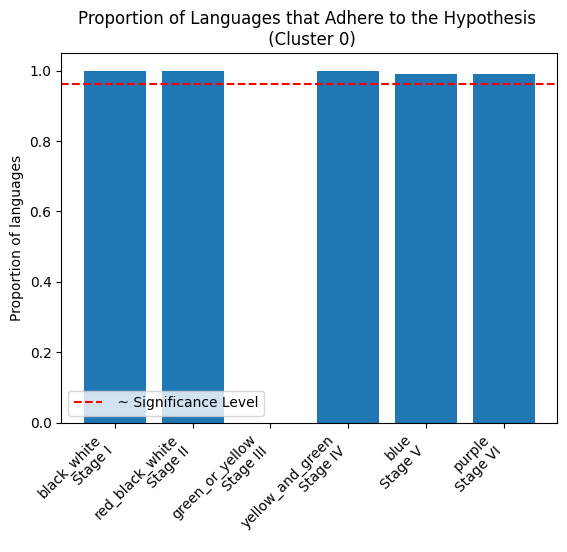

In [35]:
names = ['black_white', 'red_black_white', 'green_or_yellow', 'yellow_and_green', 'blue', 'purple']
labels = []
count = 0 
for s in list(cluster_results[0].keys()):
    
    labels.append(names[count] + '\n'+  s)
    count += 1


plt.bar(range(len(cluster_results[0])), list(cluster_results[0].values()), align='center')
plt.axhline(y= 0.963, color='red', linestyle='--', label=' ~ Significance Level')
plt.xticks(range(len(cluster_results[0])), labels)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of languages')
plt.title('Proportion of Languages that Adhere to the Hypothesis \n (Cluster 0)')
plt.legend()
plt.show()


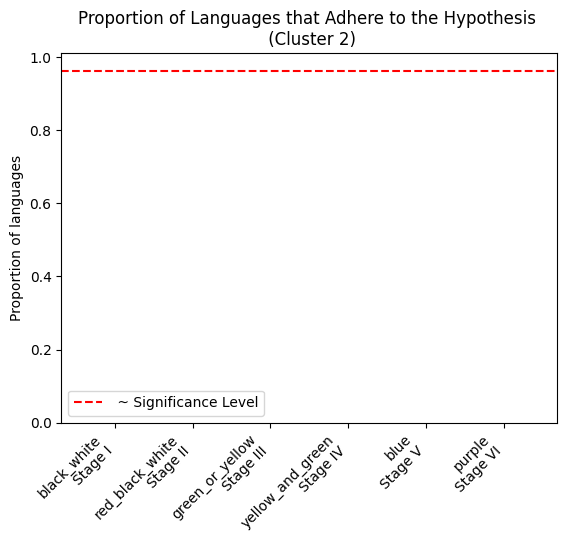

In [36]:
names = ['black_white', 'red_black_white', 'green_or_yellow', 'yellow_and_green', 'blue', 'purple']
labels = []
count = 0 
for s in list(cluster_results[0].keys()):
    
    labels.append(names[count] + '\n'+  s)
    count += 1


plt.bar(range(len(cluster_results[2])), list(cluster_results[2].values()), align='center')
plt.axhline(y= 0.963, color='red', linestyle='--', label=' ~ Significance Level')
plt.xticks(range(len(cluster_results[2])), labels)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of languages')
plt.title('Proportion of Languages that Adhere to the Hypothesis \n (Cluster 2)')
plt.legend()
plt.show()


# Berlin and Kay Data Replication


In [37]:
# import an CSV file anc convert it to a df
bK_df = pd.read_csv('Berlinkay_data.csv')
bK_df.head()
bK_df

,Terms,white,black,red,green,yellow,blue,purple
0,2,1,1,0,0,0,0,0
1,3,1,1,1,0,0,0,0
2,4,1,1,1,1,0,0,0
3,4,1,1,1,0,1,0,0
4,5,1,1,1,1,1,0,0
5,6,1,1,1,1,1,0,0
6,7,1,1,1,1,1,1,0
7,8,1,1,1,1,1,1,0
8,8,1,1,1,1,1,1,1
9,8,1,1,1,1,1,1,0


In [38]:
from scipy.stats import norm
from scipy.stats import binom_test


pass_fail = {}
proportion = {}
sample_sizes = {}
z_test = {}

# obtain the proportion of languages in the dataset that contain color terms for white and black
count = 0
sample_size = 0
for language in range(len(bK_df)):
    sample_size += 1
    if bK_df['white'][language] == 1 and bK_df['black'][language] == 1:
        count +=1
sample_proportion = count / sample_size
print (sample_size)
print(sample_proportion)


p_value = binom_test(count, sample_size, p=1, alternative='less')

z_value = 0.5




proportion['black_white'] = sample_proportion
sample_sizes['black_white'] = sample_size
pass_fail['black_white'] = p_value
z_test['black_white'] = z_value

22
1.0


In [39]:
sample_size = 0
count = 0
for language in range(len(bK_df)):
    #check if there are at least 3 color terms
    if bK_df['Terms'][language] >= 3:
        sample_size += 1
        
        if bK_df['white'][language] == 1 and bK_df['black'][language] == 1 and bK_df['red'][language] == 1:
            count +=1
sample_proportion = count / sample_size
print(sample_proportion)

p_value = binom_test(count, sample_size, p=1, alternative='less')
z_value = 0.5

print(p_value)
proportion['red_black_white'] = sample_proportion
sample_sizes['red_black_white'] = sample_size
pass_fail['red'] = p_value
z_test['red'] = 0.5


1.0
1.0


In [40]:
sample_size = 0
count = 0
for language in range(len(bK_df)):
    #check if there are at least 4 color terms
    if bK_df['Terms'][language] >= 4:
        sample_size += 1
        if bK_df['white'][language] == 1 and bK_df['black'][language] == 1 and bK_df['red'][language] == 1 and ((bK_df['yellow'][language] == 1 and bK_df['green'][language] == 0) or (bK_df['yellow'][language] == 0 and bK_df['green'][language] == 1)):
            count +=1
sample_proportion = count / sample_size


# Calculating the standard error
p_value = binom_test(count, sample_size, p=1, alternative='less')
var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
z_value = norm.cdf(z_score)

proportion['green_or_yellow'] = sample_proportion
sample_sizes['green_or_yellow'] = sample_size

pass_fail['yellow_or_green'] = p_value
z_test['yellow_or_green'] = z_value

In [41]:
sample_size = 0
count = 0
for language in range(len(bK_df)):
    #check if there are at least 4 color terms
    if bK_df['Terms'][language] >= 5:
        sample_size += 1
        if bK_df['white'][language] == 1 and bK_df['black'][language] == 1 and bK_df['red'][language] == 1 and (bK_df['yellow'][language] == 1 and bK_df['green'][language] == 1):
            count +=1
sample_proportion = count / sample_size
print(sample_proportion)

p_value = binom_test(count, sample_size, p=1, alternative='less')

z_value = 0.5


proportion['green_and_yellow'] = sample_proportion
sample_sizes['green_and_yellow'] = sample_size

pass_fail['yellow_and_green'] = p_value
z_test['yellow_and_green'] = z_value

1.0


In [42]:
sample_size = 0
count = 0
for language in range(len(bK_df)):
    #check if there are at least 4 color terms
    if bK_df['Terms'][language] >= 6:
        sample_size += 1
        if bK_df['white'][language] == 1 and bK_df['black'][language] == 1 and bK_df['red'][language] == 1 and bK_df['yellow'][language] == 1 and bK_df['green'][language] == 1 and bK_df['blue'][language] == 1:
            count +=1
sample_proportion = count / sample_size
print(sample_proportion)

p_value = binom_test(count, sample_size, p=1, alternative='less')
var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
z_value = norm.cdf(z_score)

proportion['blue'] = sample_proportion
sample_sizes['blue'] = sample_size
print(p_value)
pass_fail['blue'] = p_value
z_test['blue'] = z_value

0.9411764705882353
0.0


In [43]:
sample_size = 0
count = 0
for language in range(len(bK_df)):
    #check if there are at least 4 color terms
    if bK_df['Terms'][language] >= 7:
        sample_size += 1
        if bK_df['white'][language] == 1 and bK_df['black'][language] == 1 and bK_df['red'][language] == 1 and bK_df['yellow'][language] == 1 and bK_df['green'][language] == 1 and bK_df['blue'][language] == 1 and bK_df['purple'][language] == 1:
            count +=1
sample_proportion = count / sample_size
print(sample_proportion)

null_hypothesis_proportion = 1 #to resolve ZeroDivisionError  

# Calculating the standard error
p_value = binom_test(count, sample_size, p=1, alternative='less')
var = sample_proportion * (1 - sample_proportion)
standard_error =  ( var / sample_size) ** 0.5
z_score = (sample_proportion - null_hypothesis_proportion) / standard_error
z_value = norm.cdf(z_score)


proportion['purple'] = sample_proportion
sample_sizes['purple'] = sample_size
print( p_value)

pass_fail['purple'] = p_value
z_test['purple'] = z_value

0.5
0.0


In [44]:

z_test

{'black_white': 0.5,
 'red': 0.5,
 'yellow_or_green': 2.4232059212026654e-41,
 'yellow_and_green': 0.5,
 'blue': 0.15132284238357258,
 'purple': 3.167124183311986e-05}

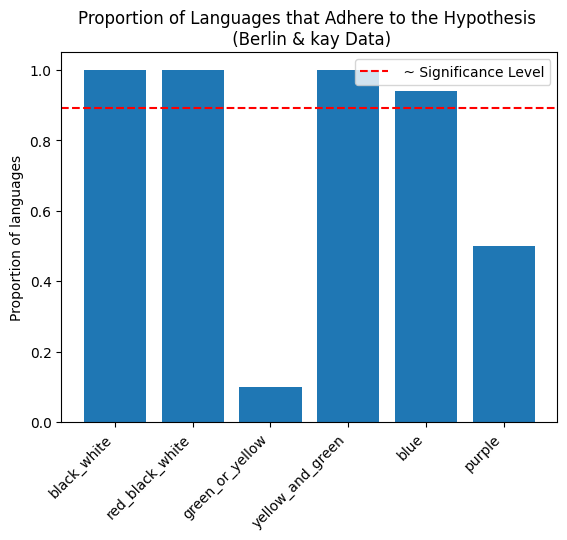

In [45]:
# plot the results of the clustering for cluster 1 
names = ['black_white', 'red_black_white', 'green_or_yellow', 'yellow_and_green', 'blue', 'purple']



plt.bar(range(len(proportion)), list(proportion.values()), align='center')
plt.axhline(y= 0.891, color='red', linestyle='--', label=' ~ Significance Level')
plt.xticks(range(len(proportion)), names)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of languages')
plt.title('Proportion of Languages that Adhere to the Hypothesis \n (Berlin & kay Data)')
plt.legend()
plt.show()

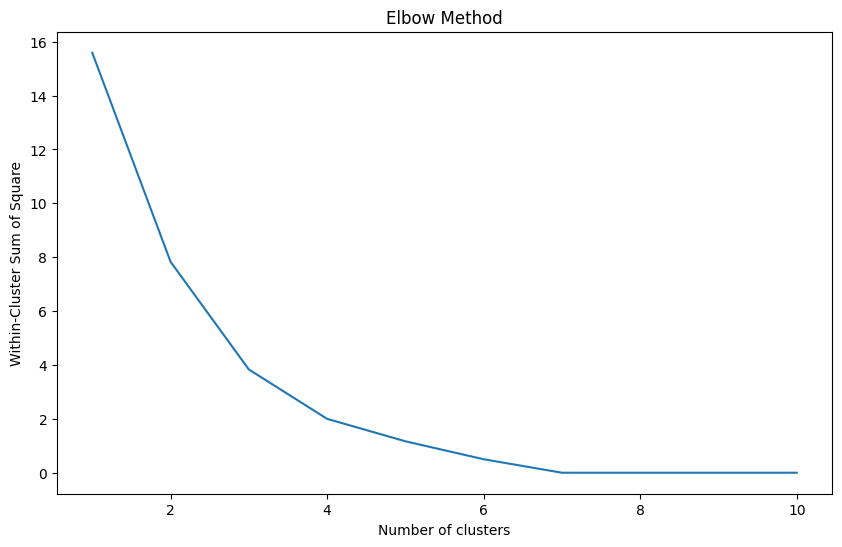

In [46]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_for_clustering = bK_df.drop('Terms', axis=1)

#Elbow Method to find the optimal number of clusters
wcss = [] 
for i in range(1, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_for_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

In [47]:
chosen_k = 3

kmeans = KMeans(n_clusters=chosen_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_for_clustering)

# Adding cluster labels to your original dataframe
bK_df['Cluster'] = cluster_labels

# Now you can analyze the clusters
print(bK_df.head(22))

    Terms  white  black  red  green  yellow  blue  purple  Cluster
0       2      1      1    0      0       0     0       0        2
1       3      1      1    1      0       0     0       0        2
2       4      1      1    1      1       0     0       0        2
3       4      1      1    1      0       1     0       0        2
4       5      1      1    1      1       1     0       0        2
5       6      1      1    1      1       1     0       0        2
6       7      1      1    1      1       1     1       0        1
7       8      1      1    1      1       1     1       0        1
8       8      1      1    1      1       1     1       1        0
9       8      1      1    1      1       1     1       0        1
10      8      1      1    1      1       1     1       0        1
11      9      1      1    1      1       1     1       1        0
12      9      1      1    1      1       1     1       0        1
13      9      1      1    1      1       1     1       0     

In [48]:
from scipy.stats import chi2_contingency

#contingency table for each color term
for color in ['white', 'black', 'red', 'yellow', 'green', 'blue', 'purple']:
    contingency_table = pd.crosstab(bK_df['Cluster'], bK_df[color])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {color} color term: p-value = {p}")


Chi-square test for white color term: p-value = 1.0
Chi-square test for black color term: p-value = 1.0
Chi-square test for red color term: p-value = 0.24738105537725047
Chi-square test for yellow color term: p-value = 0.00973936900440339
Chi-square test for green color term: p-value = 0.00973936900440339
Chi-square test for blue color term: p-value = 1.6701700790245693e-05
Chi-square test for purple color term: p-value = 1.6701700790245663e-05


In [49]:
stage_colors = {
    'Stage I': ['black', 'white'],
    'Stage II': ['black', 'white', 'red'],
    'Stage III': [],
    'Stage IV': ['black', 'white', 'red', 'yellow', 'green'],
    'Stage V': ['black', 'white', 'red', 'yellow', 'green', 'blue'],
    'Stage VI': ['black', 'white', 'red', 'yellow', 'green', 'blue', 'purple']}

min_terms_per_stage = {
    'Stage I': 2,   #At least 2 color terms (black and white)
    'Stage II': 3,  #At least 3 color terms (black, white, red)
    'Stage III': 4, #At least 4 color terms (black, white, red, and yellow or green)
    'Stage IV': 5,  #At least 5 color terms (black, white, red, yellow, green)
    'Stage V': 6,   #At least 6 color terms (black, white, red, yellow, green, blue),
    'Stage VI': 8,   #At least 6 color terms (black, white, red, yellow, green, blue)
}

cluster_sample_size = {}
def assess_cluster_alignment(cluster_df, stage_colors, min_terms_per_stage):
    cluster_alignment = {}
    for stage, colors in stage_colors.items():
        min_terms = min_terms_per_stage[stage]
        filtered_df = cluster_df[cluster_df['Terms'] >= min_terms]
        cluster_sample_size[stage] = len(filtered_df)
        if stage != 'Stage III':
            conformity = filtered_df.apply(lambda row: all(row.get(color, 0) == 1 for color in colors), axis=1).mean()
        else:
            #Special handling for Stage III
            conformity = filtered_df.apply(lambda row: (row['yellow'] == 1) ^ (row['green'] == 1), axis=1).mean()
        
        cluster_alignment[stage] = conformity
    return cluster_alignment, cluster_sample_size
 

 

In [50]:
cluster_results = {}
for cluster in bK_df['Cluster'].unique():
    cluster_df = bK_df[bK_df['Cluster'] == cluster]
    cluster_results[cluster] = assess_cluster_alignment(cluster_df, stage_colors, min_terms_per_stage)[0]
    cluster_sample_size[cluster] = assess_cluster_alignment(cluster_df, stage_colors, min_terms_per_stage)[1]

cluster_results


{2: {'Stage I': 1.0,
  'Stage II': 1.0,
  'Stage III': 0.5,
  'Stage IV': 1.0,
  'Stage V': 0.0,
  'Stage VI': nan},
 1: {'Stage I': 1.0,
  'Stage II': 1.0,
  'Stage III': 0.0,
  'Stage IV': 1.0,
  'Stage V': 1.0,
  'Stage VI': 0.0},
 0: {'Stage I': 1.0,
  'Stage II': 1.0,
  'Stage III': 0.0,
  'Stage IV': 1.0,
  'Stage V': 1.0,
  'Stage VI': 1.0}}

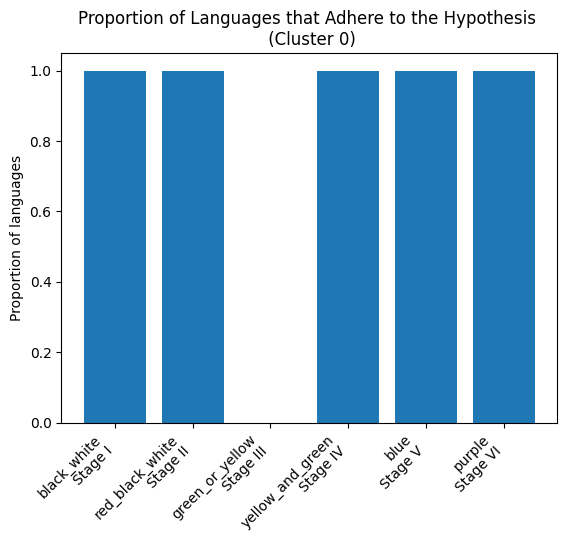

In [51]:
# make 3 bar graphs one for each cluster

# plot the results of the clustering for cluster 1
names = ['black_white', 'red_black_white', 'green_or_yellow', 'yellow_and_green', 'blue', 'purple']
labels = []
count = 0
for s in list(cluster_results[0].keys()):
    labels.append(names[count] + '\n'+  s)
    count += 1


plt.bar(range(len(cluster_results[0])), list(cluster_results[0].values()), align='center')
plt.xticks(range(len(cluster_results[0])), labels)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of languages')
plt.title('Proportion of Languages that Adhere to the Hypothesis \n (Cluster 0)')
plt.show()




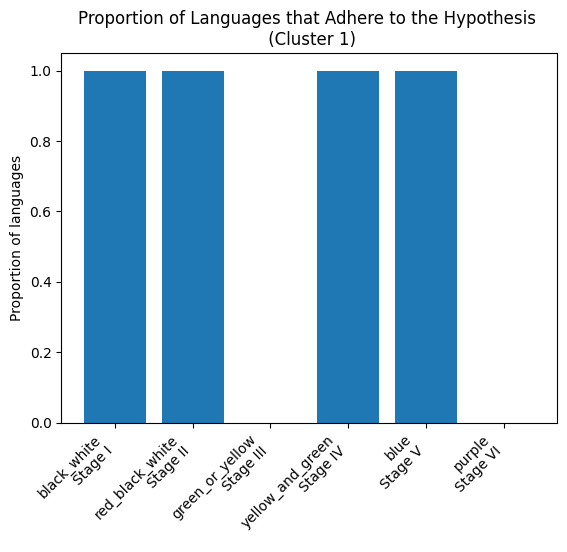

In [52]:
plt.bar(range(len(cluster_results[1])), list(cluster_results[1].values()), align='center')
plt.xticks(range(len(cluster_results[1])), labels)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of languages')
plt.title('Proportion of Languages that Adhere to the Hypothesis \n (Cluster 1)')
plt.show()

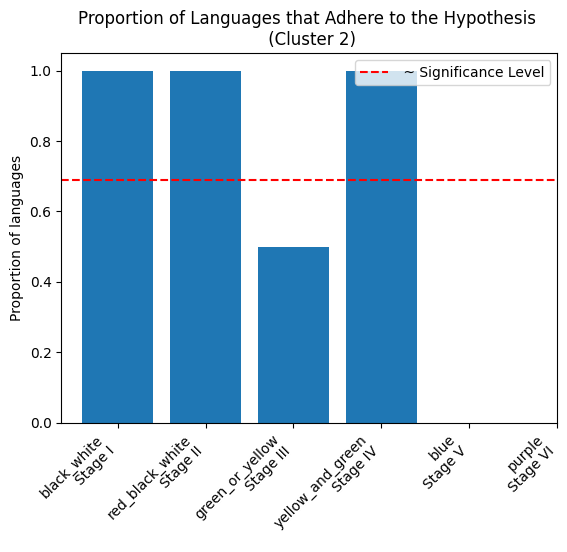

In [53]:
plt.bar(range(len(cluster_results[2])), list(cluster_results[2].values()), align='center')
plt.axhline(y= 0.69, color='red', linestyle='--', label=' ~ Significance Level')
plt.xticks(range(len(cluster_results[2])), labels)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion of languages')
plt.title('Proportion of Languages that Adhere to the Hypothesis \n (Cluster 2)')
plt.legend()
plt.show()